<a href="https://colab.research.google.com/github/Shree2706/Image-based-Classification-using-Convolutional-Neural-Networks/blob/main/image_based_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

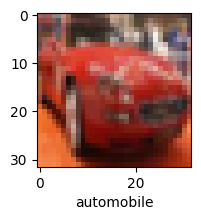

In [11]:
plot_sample(X_train, y_train, 5)

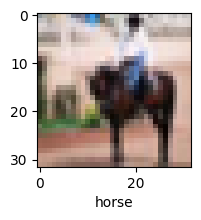

In [12]:
plot_sample(X_train, y_train, 11)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
# first lets built a ANN model

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 147s 93ms/step - loss: 1.8074 - accuracy: 0.3577
Epoch 2/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.6198 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5404 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4820 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 145s 92ms/step - loss: 1.4311 - accuracy: 0.4964


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred =ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classificaiton report: \n' , classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 30ms/step
classificaiton report: 
               precision    recall  f1-score   support

           0       0.67      0.37      0.47      1000
           1       0.68      0.46      0.55      1000
           2       0.37      0.39      0.38      1000
           3       0.34      0.42      0.38      1000
           4       0.52      0.29      0.37      1000
           5       0.49      0.25      0.33      1000
           6       0.49      0.61      0.55      1000
           7       0.51      0.59      0.55      1000
           8       0.39      0.83      0.53      1000
           9       0.54      0.51      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [17]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

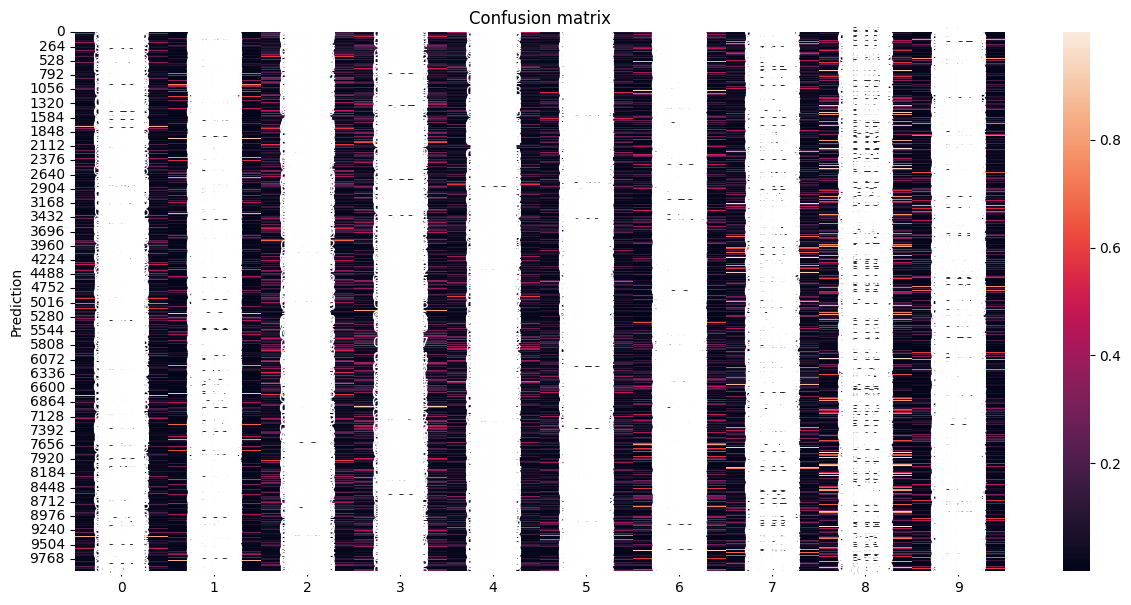

In [18]:
plt.figure(figsize = (15,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [19]:
# So, now lets build the CNN model

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4767 - accuracy: 0.4684
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1068 - accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9718 - accuracy: 0.6618
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8807 - accuracy: 0.6955
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8065 - accuracy: 0.7183
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7451 - accuracy: 0.7390
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6920 - accuracy: 0.7601
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6435 - accuracy: 0.7770
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6014 - accuracy: 0.7907
Epoch 10/10
1563/1563 [==============================] - 68s 43m

In [23]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9293 - accuracy: 0.6994


[0.9292903542518616, 0.699400007724762]

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[4.91461076e-04, 3.85068734e-06, 2.95409490e-03, 9.61411417e-01,
        1.38059157e-04, 1.72791258e-02, 1.29840309e-02, 1.44641977e-04,
        4.57573403e-03, 1.75700370e-05],
       [4.19781609e-05, 1.58611767e-03, 2.98187956e-07, 1.33372708e-08,
        6.38932818e-09, 6.26759408e-11, 1.23870009e-07, 1.71469272e-09,
        9.98363376e-01, 8.05307627e-06],
       [7.09807202e-02, 4.02108617e-02, 1.08006755e-02, 1.86244808e-02,
        1.47422811e-03, 1.54252723e-03, 6.52435236e-04, 2.51174835e-03,
        8.47409606e-01, 5.79261128e-03],
       [8.19089949e-01, 4.09096144e-02, 8.81328434e-03, 9.59288096e-04,
        1.97250210e-03, 1.68949300e-05, 2.96773971e-04, 4.84779848e-05,
        1.27612278e-01, 2.80898239e-04],
       [1.54122017e-06, 3.51029917e-06, 1.70744862e-02, 9.17134359e-02,
        7.58496284e-01, 3.09638423e-03, 1.29107594e-01, 2.98600178e-04,
        9.51093389e-05, 1.13060880e-04]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

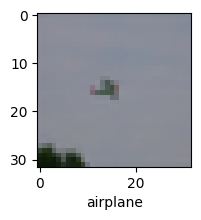

In [35]:
plot_sample(X_test, y_test, 97)

In [36]:
classes[y_classes[97]]

'airplane'